# Session 4- Tensorflow Tutorial

## What is Tensorflow

TensorFlow is an open source software library for numerical computation using data flow graphs. We will demonstrate how to define and train neural network models for multi-class classification problems.

In this tutorial, we will train:
- Single layer Model
- One-Hidden Layer Neural Network Model

## Back to MNIST

The following code will import and download the MNIST dataset.

In [22]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train),(x_test, y_test) = mnist.load_data()

60000 10000
(60000, 28, 28) (60000,)
0 255


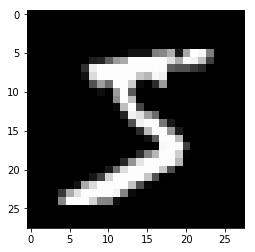

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# mnist is now a DataSet with accessors for:
#'train' and 'test'
# within each, we can access:
# images, labels, and num_examples
print(len(x_train),
      len(x_test))

# the images are stored as:
# n_observations x 28 x 28
# the labels are stored as n_observations
print(x_train.shape, y_train.shape)

# the range of the values of the images is from 0-255
print(np.min(x_train), np.max(x_train))

# we can visualize any one of the images by reshaping it to a 28x28 image
plt.imshow(x_train[0], cmap='gray')

Logistic regression is a linear model. It solves the same problem that the perceptron algorithm solves - finding a linear seperator for our data.

First, we must normalize the images:

In [23]:
x_train = x_train / 255.0

x_test = x_test / 255.0

Next, let us define our model, it's pretty basic.
<br>
It will contain a single layer with a __Softmax activation function__

<img src="imgs/softmax.PNG"/>

In [24]:
#Building the model
model = tf.keras.models.Sequential()    # Creating a Sequential network (FeedForward)
model.add(tf.keras.layers.Flatten())    # Flatting the image from a 28x28 to a 784x1 column
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   # Creating an output layer with 10 neurones and with an softmax for probability distibution

We need to minimize some loss/cost function.
<br>
In our case this function is called cross-entropy (or negative log likelihood for the one-hot case)

<img src="imgs/negativeLogLike.PNG"/>

To optimize, we will use a technique called __Stochastic Gradient Descent__

In [25]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

sgd = optimizers.SGD(lr=0.01);
                     
model.compile(optimizer=sgd,                                 # The optimizer to use in order to update the weights
              loss=losses.sparse_categorical_crossentropy,     # The cross entropy loss function
              metrics=['accuracy'])

## Fitting the model with the training data

We would like to observe the loss function values throught the training process.
<br>
This is why we create a callback to store the loss and accuracy function values:

In [30]:
class LossAccHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))

We will add the callback to the model's fitting

In [31]:
n_epochs = 10
batch_size = 100

history = LossAccHistory()
model.fit(x_train, y_train, validation_split=0.1, shuffle=True, 
          epochs=n_epochs, batch_size=batch_size,
          callbacks=[history])   #Trainning the model with the data

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 28us/step - loss: 0.3852 - acc: 0.8951 - val_loss: 0.3172 - val_acc: 0.9167
Epoch 2/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.3792 - acc: 0.8965 - val_loss: 0.3122 - val_acc: 0.9172
Epoch 3/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.3739 - acc: 0.8976 - val_loss: 0.3083 - val_acc: 0.9158
Epoch 4/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.3692 - acc: 0.8991 - val_loss: 0.3047 - val_acc: 0.9180
Epoch 5/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.3649 - acc: 0.9001 - val_loss: 0.3011 - val_acc: 0.9183
Epoch 6/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3610 - acc: 0.9008 - val_loss: 0.2981 - val_acc: 0.9185
Epoch 7/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3575 - acc: 0.9023 - val_loss: 0.2956 - val_acc:

Let us evaluate The accuracy and the loss of the model:

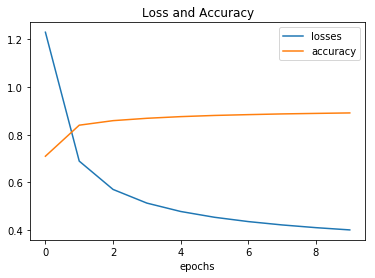

In [9]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('epochs')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

## But Wait...

This is our accuracy on the validation set! What we really want to know is how we performed on the test set:

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.9011


We got a 90% accuracy on the test data! 

## Adding Layers

So what we have so far is a linear model, basically 1 layer.

Why not add a hidden layer?

Let us define a new model by using a hidden layer with a ReLU activation function
- Why use non-linearities? (combining linear function yields a linear function)
- Other options for activation functions? (sigmoid, tanh, etc.)

We will implement a model called MLP (Multi Layer Perceptron). It will have the following structure:
- Input layer (784)
- Hidden layer (256) with an activation function of ReLU
- Output layer (10)  with an activation function of softmax

In [11]:
model = tf.keras.models.Sequential()    # Creating a Sequential network (FeedForward)
model.add(tf.keras.layers.Flatten())    # Flatting the image from a 28x28 to a 784x1 column
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))   # Creating a fully connected layer With 128 neurons with ReLu activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   # Creating an output layer with 10 neurones and with an softmax for probability distibution

The ReLU activation function is defined as:
\begin{equation}
  x'= \max(0, x)
\end{equation}

And the softmax function is defined as:
\begin{equation}
  \frac{e^{y_i}}{\sum_{k=1}^{n} e^{y_k}}
\end{equation}

Now lets use a different optimization technique, instead of using __Stochastic Gradient Descent__ let us use a method called __ADAM__ (it is a varient of SGD, only with different learning rates for each dimension).

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Putting it All Together

In [13]:
class EpochLossAccHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))
        
n_epochs = 10
batch_size = 100

history = EpochLossAccHistory()
model.fit(x_train, y_train, validation_split=0.1, shuffle=True, 
          epochs=n_epochs, batch_size=batch_size,
          callbacks=[history])   #Trainning the model with the data

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.3049 - acc: 0.9141 - val_loss: 0.1312 - val_acc: 0.9635
Epoch 2/10
54000/54000 [==============================] - 4s 73us/step - loss: 0.1318 - acc: 0.9615 - val_loss: 0.1025 - val_acc: 0.9708
Epoch 3/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.0880 - acc: 0.9741 - val_loss: 0.0867 - val_acc: 0.9765
Epoch 4/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.0641 - acc: 0.9811 - val_loss: 0.0753 - val_acc: 0.9778
Epoch 5/10
54000/54000 [==============================] - 4s 73us/step - loss: 0.0492 - acc: 0.9856 - val_loss: 0.0768 - val_acc: 0.9770
Epoch 6/10
54000/54000 [==============================] - 4s 73us/step - loss: 0.0386 - acc: 0.9890 - val_loss: 0.0745 - val_acc: 0.9790
Epoch 7/10
54000/54000 [==============================] - 4s 73us/step - loss: 0.0292 - acc: 0.9924 - val_loss: 0.0703 - val_acc:

We have an accuracy of 99% on the train data!
<br>
__WOW!__

## Cool. Lets See Some Results

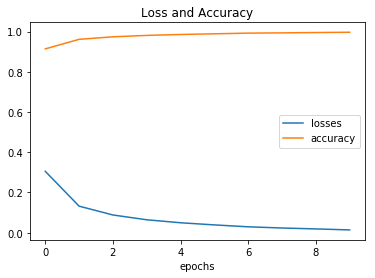

In [14]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('epochs')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

## Test Set

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/step
Test accuracy: 0.9796


Let's predict some images:

In [19]:
predictions = model.predict(x_test[:25]);
true_labels = y_test[:25];

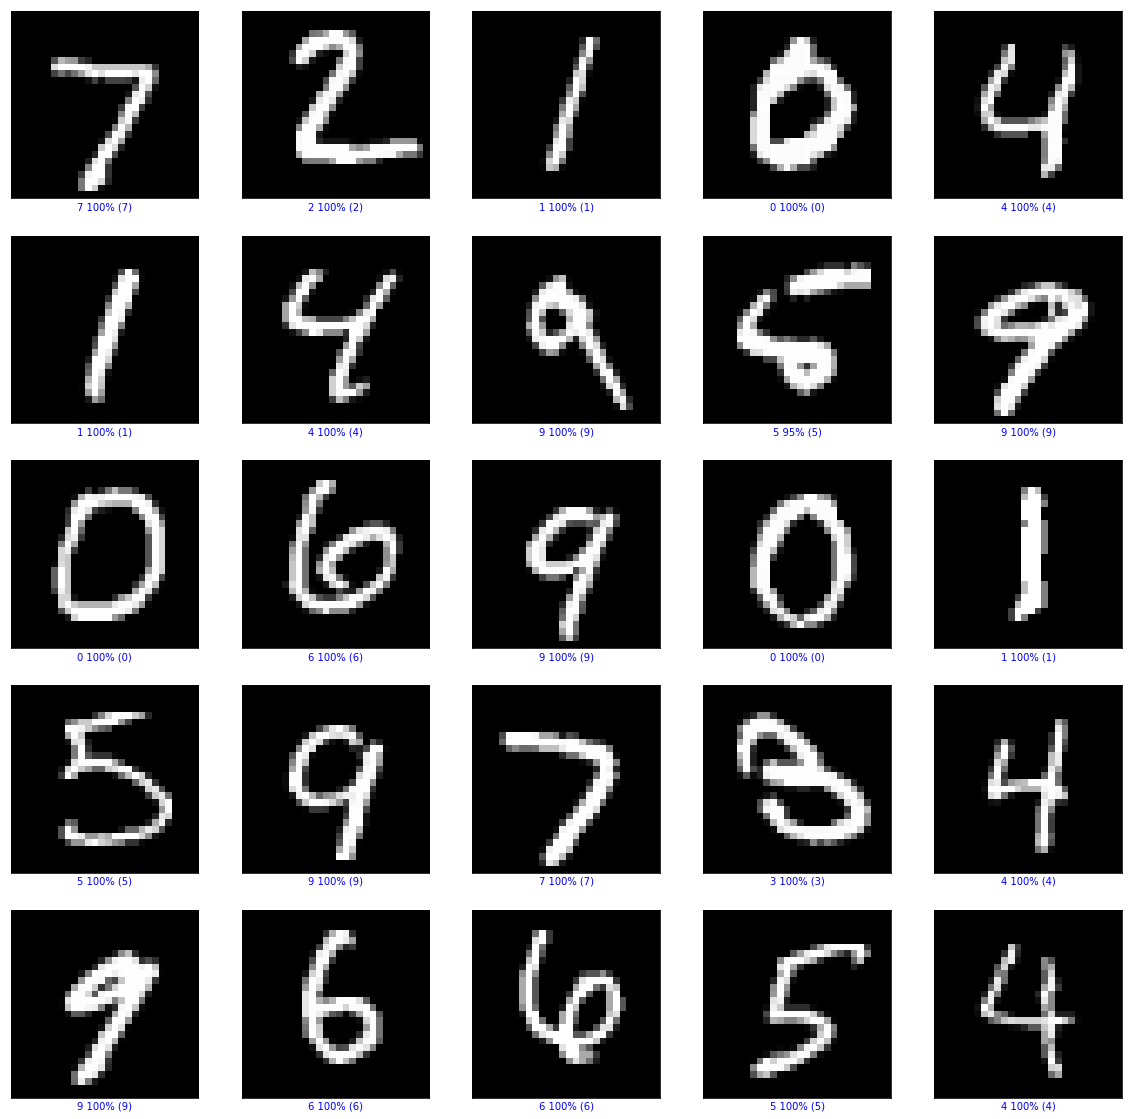

In [21]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions, true_labels, x_test[:25] * 255.0)

This is much better!

# Your Turn
Now that you have seen how to build simple models, it's your turn to experiment.

Train an MLP.

Follow the instuctions in the following link:

In [ ]:
https://www.tensorflow.org/tutorials/keras/basic_classification